# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [1]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
import scipy as sp
from skimage import io

from skimage import img_as_float
from matplotlib import cm
from skimage import img_as_ubyte
from scipy import signal



Pretty printing has been turned OFF


## Filtering 
**1.1**

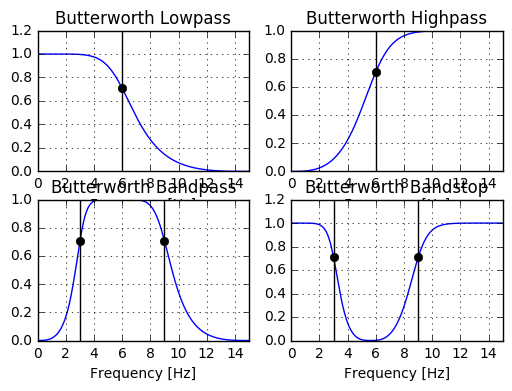

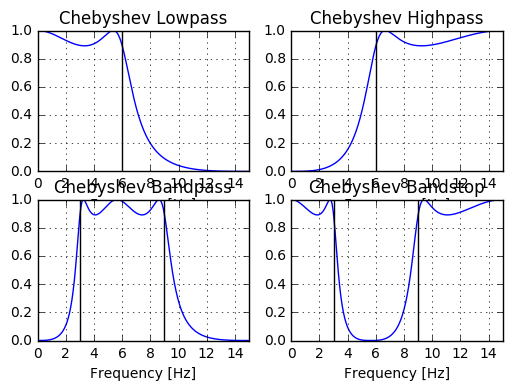

In [17]:
from scipy.signal import butter, lfilter, freqz, cheby1

def butter_filter(cutoff, fs, order=3, btype='low'):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype, analog=False)
    return b, a

def butter_filter_band(cutoff, fs, order=3, btype='bandpass'):
    nyq = 0.5 * fs
    normal_cutoff = np.divide(cutoff, nyq)
    b, a = butter(order, normal_cutoff, btype, analog=False)
    return b, a

def cheby_filter(cutoff, ripple, fs, order=3, btype='low'):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = cheby1(order, ripple, normal_cutoff, btype, analog=False)
    return b, a

def cheby_filter_band(cutoff, ripple, fs, order=3, btype='bandpass'):
    nyq = 0.5 * fs
    normal_cutoff = np.divide(cutoff, nyq)
    b, a = cheby1(order, ripple, normal_cutoff, btype, analog=False)
    return b, a


#BUTTERWORTH:

# Filter requirements.
order = 3
fs = 30 # sample rate, Hz
cutoff = 6  # desired cutoff frequency of the filter, Hz

#LOW-PASS FILTER:

# Get the filter coefficients so we can check its frequency response.
b, a = butter_filter(cutoff, fs, order, 'low')

# Plot the frequency response.
w, h = freqz(b, a)
plt.subplot(2, 2, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Butterworth Lowpass")
plt.xlabel('Frequency [Hz]')
plt.grid()

#HIGH-PASS FILTER:

# Get the filter coefficients so we can check its frequency response.
b, a = butter_filter(cutoff, fs, order, 'high')

# Plot the frequency response.
w, h = freqz(b, a)
plt.subplot(2, 2, 2)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Butterworth Highpass")
plt.xlabel('Frequency [Hz]')
plt.grid()

# Filter requirements for bandpass:
order = 3
fs = 30 # sample rate, Hz
cutoff = [3, 9]  # desired cutoff frequency of the filter, Hz

#BAND-PASS FILTER:

# Get the filter coefficients so we can check its frequency response.
b, a = butter_filter_band(cutoff, fs, order, 'bandpass')

# Plot the frequency response.
w, h = freqz(b, a)
plt.subplot(2, 2, 3)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff[0], 0.5*np.sqrt(2), 'ko')
plt.plot(cutoff[1], 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff[0], color='k')
plt.axvline(cutoff[1], color='k')
plt.xlim(0, 0.5*fs)
plt.title("Butterworth Bandpass")
plt.xlabel('Frequency [Hz]')
plt.grid()


#BAND-STOP FILTER:

# Get the filter coefficients so we can check its frequency response.
b, a = butter_filter_band(cutoff, fs, order, 'bandstop')

# Plot the frequency response.
w, h = freqz(b, a)
plt.subplot(2, 2, 4)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff[0], 0.5*np.sqrt(2), 'ko')
plt.plot(cutoff[1], 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff[0], color='k')
plt.axvline(cutoff[1], color='k')
plt.xlim(0, 0.5*fs)
plt.title("Butterworth Bandstop")
plt.xlabel('Frequency [Hz]')
plt.grid()


#CHEBYSHEV:

# Filter requirements.
order = 3
fs = 30 # sample rate, Hz
cutoff = 6  # desired cutoff frequency of the filter, Hz
ripple=1.0

#LOW-PASS FILTER:

# Get the filter coefficients so we can check its frequency response.
b, a = cheby_filter(cutoff, ripple, fs, order, 'low')

# Plot the frequency response.
w, h = freqz(b, a)
plt.figure()
plt.subplot(2, 2, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Chebyshev Lowpass")
plt.xlabel('Frequency [Hz]')
plt.grid()

#HIGH-PASS FILTER:

# Get the filter coefficients so we can check its frequency response.
b, a = cheby_filter(cutoff, ripple, fs, order, 'high')

# Plot the frequency response.
w, h = freqz(b, a)
plt.subplot(2, 2, 2)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Chebyshev Highpass")
plt.xlabel('Frequency [Hz]')
plt.grid()

# Filter requirements for bandpass:
order = 3
fs = 30 # sample rate, Hz
cutoff = [3, 9]  # desired cutoff frequency of the filter, Hz
ripple=1.0

#BAND-PASS FILTER:

# Get the filter coefficients so we can check its frequency response.
b, a = cheby_filter_band(cutoff, ripple, fs, order, 'bandpass')

# Plot the frequency response.
w, h = freqz(b, a)
plt.subplot(2, 2, 3)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.axvline(cutoff[0], color='k')
plt.axvline(cutoff[1], color='k')
plt.xlim(0, 0.5*fs)
plt.title("Chebyshev Bandpass")
plt.xlabel('Frequency [Hz]')
plt.grid()

#BAND-STOP FILTER:

# Get the filter coefficients so we can check its frequency response.
b, a = cheby_filter_band(cutoff, ripple, fs, order, 'bandstop')

# Plot the frequency response.
w, h = freqz(b, a)
plt.subplot(2, 2, 4)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.axvline(cutoff[0], color='k')
plt.axvline(cutoff[1], color='k')
plt.xlim(0, 0.5*fs)
plt.title("Chebyshev Bandstop")
plt.xlabel('Frequency [Hz]')
plt.grid()

**1.2**

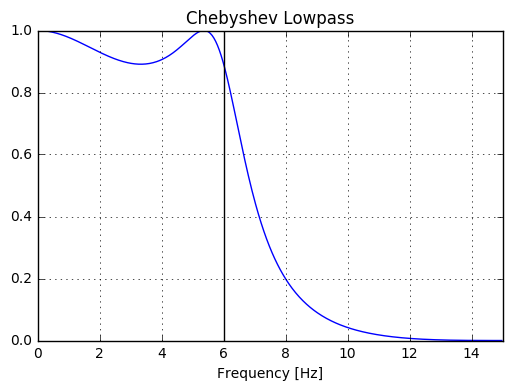

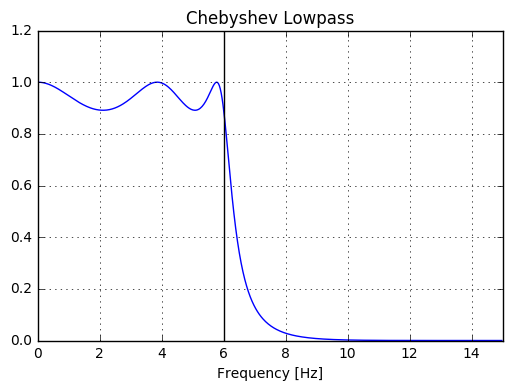

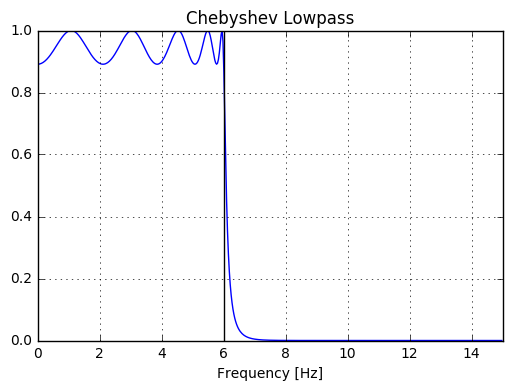

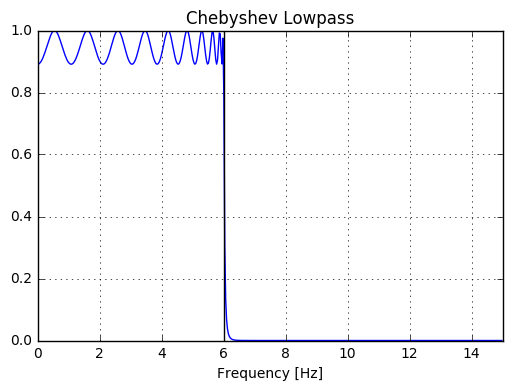

In [19]:
#CHEBYSHEV:

# Filter requirements.
fs = 30 # sample rate, Hz
cutoff = 6  # desired cutoff frequency of the filter, Hz
ripple=1.0

#LOW-PASS FILTER:

# Get the filter coefficients so we can check its frequency response.

orders=[3,5,10,20]

for order in orders:
    b, a = cheby_filter(cutoff, ripple, fs, order, 'low')

    # Plot the frequency response.
    w, h = freqz(b, a)
    plt.figure()
    plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
    plt.axvline(cutoff, color='k')
    plt.xlim(0, 0.5*fs)
    plt.title("Chebyshev Lowpass")
    plt.xlabel('Frequency [Hz]')
    plt.grid()
    
#As seen in the frequency responses for the increasing orders of the filter, the slope for the cutoff frequency
#gets more straight, and it can also be noted that there 

## Recursive filter 

**2.1**

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.]


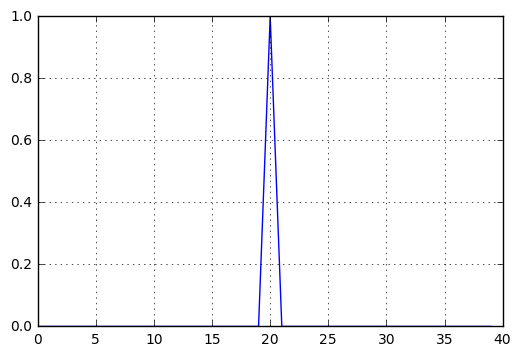

In [20]:
def dirac_signal(n, N):
    if n>(N-1):
        print('n is greater than N!')
        x=0;
    else:
        array=np.zeros(N);
        array[n]=1;
    return array

dirac_sig=dirac_signal(20,40)

plt.figure()
plt.plot(dirac_sig)
plt.grid()

print(dirac_sig)

**2.2**

40


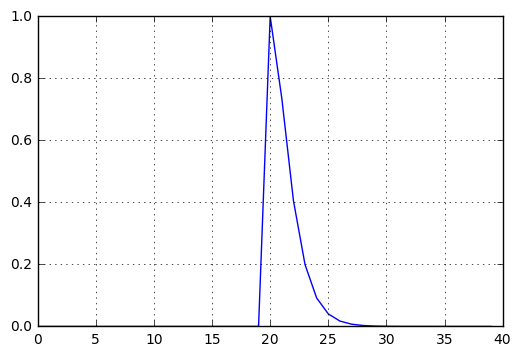

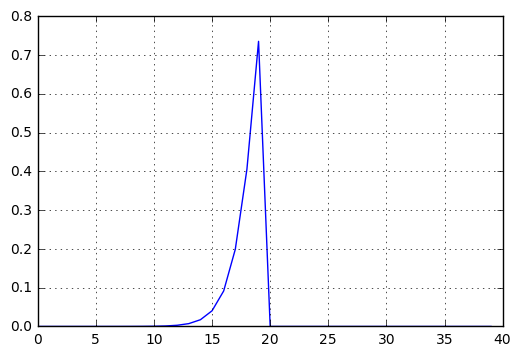

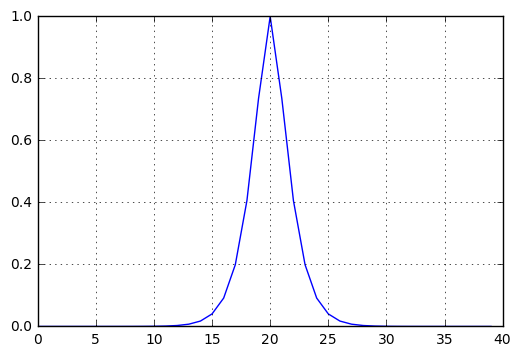

In [58]:
print(len(dirac_sig))

filtered_sig_causal=np.zeros(len(dirac_sig))
filtered_sig_anticausal=np.zeros(len(dirac_sig))

Ts=1
s=1
alpha=s*Ts
a=np.exp(-alpha)

#Causal part:
for i in range(2,len(dirac_sig)):
    filtered_sig_causal[i]=dirac_sig[i] + a*(alpha-1)*dirac_sig[i-1] + 2*a*filtered_sig_causal[i-1] - np.power(a,2)*filtered_sig_causal[i-2]
    
#Anti-causal part:
for i in range(len(dirac_sig)-3,0,-1):
    filtered_sig_anticausal[i]=a*(alpha+1)*dirac_sig[i+1] - np.power(a,2)*dirac_sig[i+2] + 2*a*filtered_sig_anticausal[i+1] - np.power(a,2)*filtered_sig_anticausal[i+2]
    
filtered_sig=filtered_sig_causal + filtered_sig_anticausal
    
plt.figure()
plt.plot(filtered_sig_causal)
plt.grid()

plt.figure()
plt.plot(filtered_sig_anticausal)
plt.grid()

plt.figure()
plt.plot(filtered_sig)
plt.grid()

#From the previous figures I can conclude that the Causal filter smooths the right components of the signal,
#mainly because it has previous values to make calculations; on the other side, the Anti-causal filter smooths
#the left components because it takes future values from the signal.



**2.3**

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.]


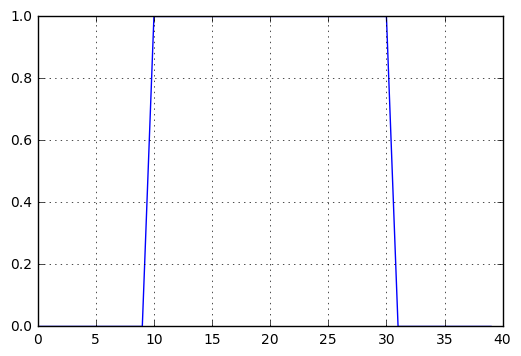

In [61]:
def step_signal(n1, n2, N):
    if n2>(N-1):
        print('n is greater than N!')
        x=0;
    else:
        array=np.zeros(N);
        array[n1:n2+1]=1;
    return array

step_sig=step_signal(10,30,40)

plt.figure()
plt.plot(step_sig)
plt.grid()

print(step_sig)

**2.4**

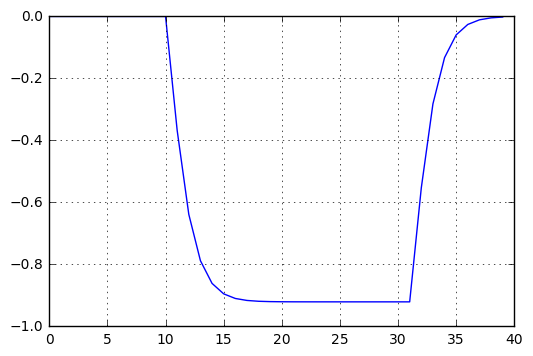

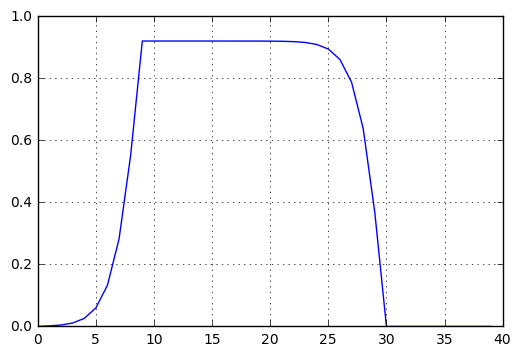

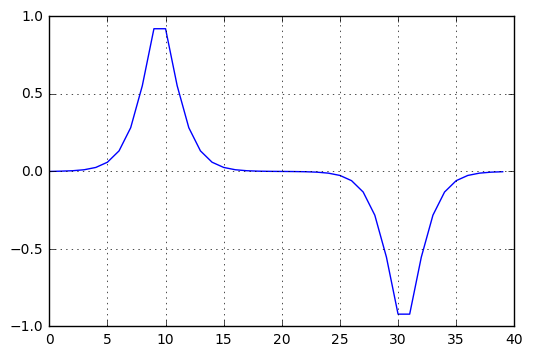

In [64]:
derived_sig_causal=np.zeros(len(step_sig))
derived_sig_anticausal=np.zeros(len(step_sig))

Ts=1
s=1
alpha=s*Ts
a=np.exp(-alpha)

#Causal part:
for i in range(2,len(step_sig)):
    derived_sig_causal[i]= -s*alpha*a*step_sig[i-1] + 2*a*derived_sig_causal[i-1] - np.power(a,2)*derived_sig_causal[i-2]
    
#Anti-causal part:
for i in range(len(step_sig)-3,0,-1):
    derived_sig_anticausal[i]= s*alpha*a*step_sig[i+1] + 2*a*derived_sig_anticausal[i+1] - np.power(a,2)*derived_sig_anticausal[i+2]
    
derived_sig=derived_sig_causal + derived_sig_anticausal
    
plt.figure()
plt.plot(derived_sig_causal)
plt.grid()

plt.figure()
plt.plot(derived_sig_anticausal)
plt.grid()

plt.figure()
plt.plot(derived_sig)
plt.grid()

#According to the previous figures, the derivative filter gives us the amount of change in the signal.


**3.1**

512


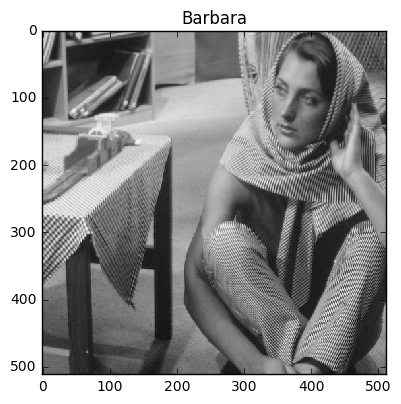

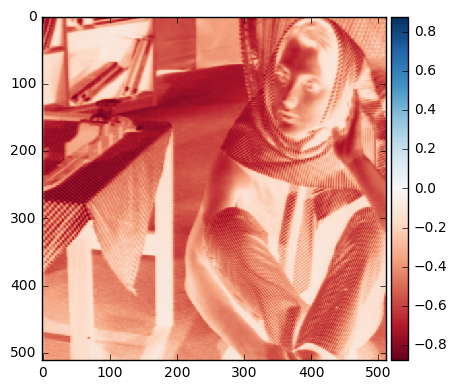

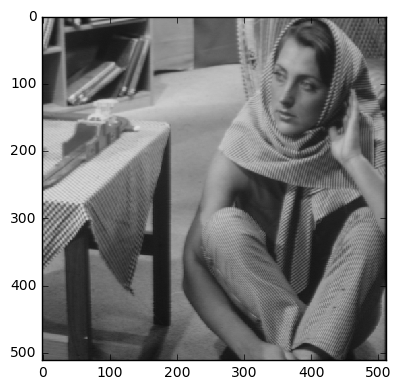

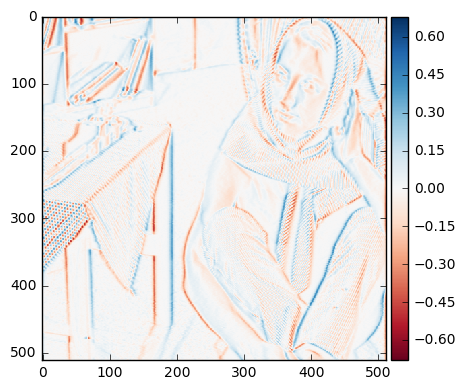

In [13]:
#FOR APPLYING SMOOTHING FILTER ALONG THE COLUMNS:

from skimage import color 
Path = '../images/'
barbara_im = io.imread(Path.__add__('barbara.gif'))
barbara_im = img_as_float(color.rgb2gray(barbara_im))
plt.figure()
io.imshow(barbara_im)
plt.title('Barbara')
print(barbara_im.shape[0])

derived_im_causal = np.zeros((barbara_im.shape[0],barbara_im.shape[1]))
derived_im_anticausal = np.zeros((barbara_im.shape[0],barbara_im.shape[1]))

Ts=1
s=1
alpha=s*Ts
a=np.exp(-alpha)

#Causal part:

for i in range(barbara_im.shape[0]):
    for j in range(barbara_im.shape[1]):
        derived_im_causal[i,j]= -s*alpha*a*barbara_im[i,j-1] + 2*a*derived_im_causal[i,j-1] - np.power(a,2)*derived_im_causal[i,j-2]
    
#Anti-causal part:
for i in range(barbara_im.shape[0]):
    for j in range(barbara_im.shape[1]-3,0,-1):
        derived_im_anticausal[i,j]= s*alpha*a*barbara_im[i,j+1] + 2*a*derived_im_anticausal[i,j+1] - np.power(a,2)*derived_im_anticausal[i,j+2]
    
plt.figure()
io.imshow(derived_im_causal)

plt.figure()
io.imshow(derived_im_anticausal)
    
derived_im=derived_im_causal + derived_im_anticausal

plt.figure()
io.imshow(derived_im)
    

**3.2** , **3.3**

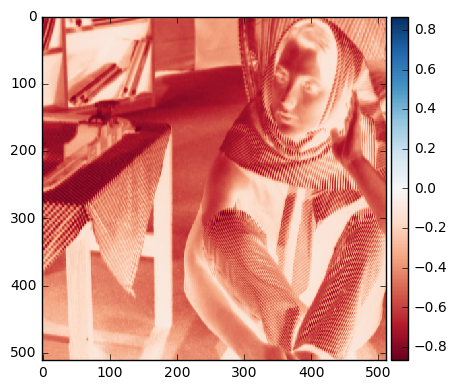

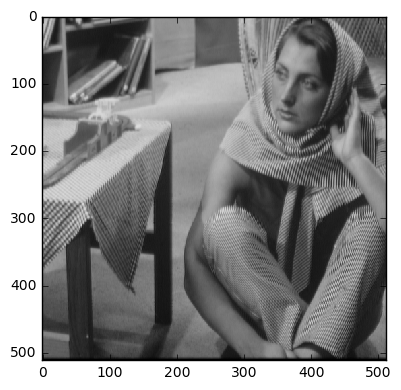

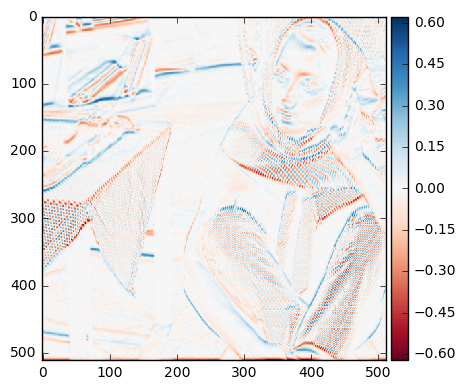

In [14]:
#FOR APPLYING SMOOTHING FILTER ALONG THE ROWS:

derived_im_causal = np.zeros((barbara_im.shape[0],barbara_im.shape[1]))
derived_im_anticausal = np.zeros((barbara_im.shape[0],barbara_im.shape[1]))

Ts=1
s=1
alpha=s*Ts
a=np.exp(-alpha)

#Causal part:

for j in range(barbara_im.shape[0]):
    for i in range(barbara_im.shape[1]):
        derived_im_causal[i,j]= -s*alpha*a*barbara_im[i-1,j] + 2*a*derived_im_causal[i-1,j] - np.power(a,2)*derived_im_causal[i-2,j]
    
#Anti-causal part:
for j in range(barbara_im.shape[0]):
    for i in range(barbara_im.shape[1]-3,0,-1):
        derived_im_anticausal[i,j]= s*alpha*a*barbara_im[i+1,j] + 2*a*derived_im_anticausal[i+1,j] - np.power(a,2)*derived_im_anticausal[i+2,j]
    
plt.figure()
io.imshow(derived_im_causal)

plt.figure()
io.imshow(derived_im_anticausal)
    
derived_im=derived_im_causal + derived_im_anticausal

plt.figure()
io.imshow(derived_im)

**3.4**